# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The **number of restaurants** in New York is increasing day by day. Lots of **students and busy professionals** rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a **fixed margin of the delivery order** from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the **demand of different restaurants which will help them in enhancing their customer experience**. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [55]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Mounting the drive folder to reach to the data

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [58]:
# read the data
#df = pd.read_csv('foodhub_order.csv')
df = pd.read_csv('/content/drive/MyDrive/Great Learning x MIT/Assignment 1 - Foundations for Data Science/Foodhub Order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

*   The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.
*   'rating' column has both integers and strings





### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [59]:
# Write your code here
# Using .shape to get the row and column numbers
print('Data has', df.shape[0], 'rows and', df.shape[1], 'columns.')

Data has 1898 rows and 9 columns.


#### Observations:


Data has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [60]:
# Use info() to print a concise summary of the DataFrame
# Using .info() to see the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   order_id, customer_id, food_preparation_time, delivery_time has integer data
*   restaurant_name, cuisine_type, day_of_the_week, rating has string data, however some of the data in rating column can be possibly changed to integer
*   cost_of_the_order has float data




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [61]:
# Write your code here
# Using .isnull()
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


No missing value exists in any of the columns.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [62]:
# Write your code here
# Using .describe() to check statistical summary of the data
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:


*   Preparation time after the order is placed:
  *      min: 20 mins
  *      average: ˜27.37 mins
  *      max: 35 mins

### **Question 5:** How many orders are not rated? [1 mark]

In [63]:
# Write the code here
# Counting orders rated as 'Not given'
print(df[df['rating']=='Not given']['rating'].count(), 'orders are not rated.')

#Also could be seen by following code
#df['rating'].value_counts()

736 orders are not rated.


#### Observations:


736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

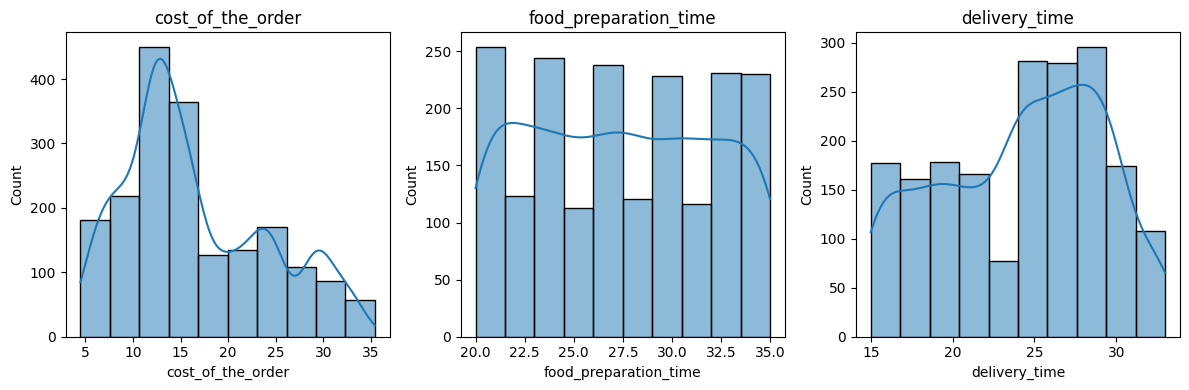

In [64]:
# Write the code here
# First let's check the continous data with histograms

# A new list with the variables that contain continous data is created
continous_cols=['cost_of_the_order','food_preparation_time','delivery_time']

#for loop to go over each variable in the created list and plot histograms
plt.figure(figsize=(12,4))   #sets width and height of the figure
for i, column in enumerate(continous_cols):   #iterates within the list with the indices
  plt.subplot(1,len(continous_cols),i+1)   #provides row, column and position of the subplot
  sns.histplot(data=df, x=column, bins=10, kde=True)   #plots a histogram of variables, with the kde function
  plt.title(column)   #sets the title
  plt.tight_layout()   #aranges a better fit
plt.show()

#### Observations:


*   Cost of order has a high peak around 12. It has 3, maybe 2  modes. It doesn't look like a normal distribution.  
*   Food preparation time distribution seems to have a uniform distribution.
*   Delivery time has a distribution left skewed, doesn't look like a normal distribution.



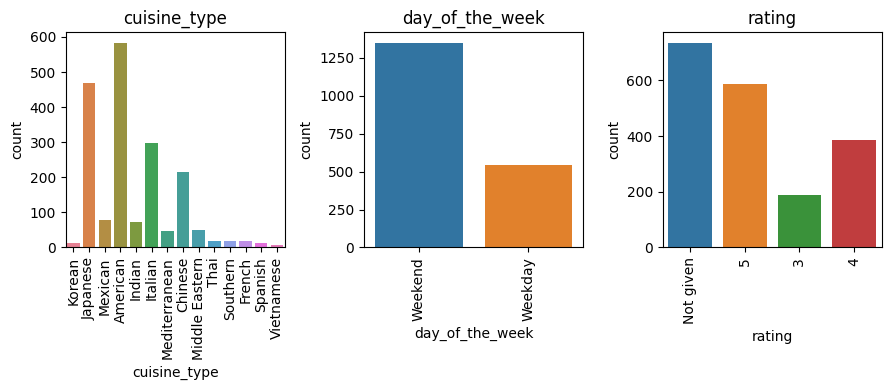

In [65]:
# Now let's check some of the categorical data with histograms
# Variables 'order_id' and 'customer_id' are just number assigned, beacuse of that they are left out of this analysis.
# Variable 'restaurant_name' is plotted seperately.

# A new list with the variables that contain categorical data is created
categ_cols=['cuisine_type', 'day_of_the_week', 'rating']

#for loop to go over each variable in the created list and plot histograms
plt.figure(figsize=(12,4))    #sets width and height of the figure
for i, column in enumerate(categ_cols):   #iterates within the list with the indices
  plt.subplot(1,4,i+1)   #provides row, column and position of the subplot
  sns.countplot(data=df,x=column,hue=column)   #plots a histogram of variables, with the kde function
  plt.title(column)   #sets the title
  plt.xticks(rotation=90)   #rotates x axis labels for better visibility
  plt.tight_layout()    #aranges a better fit
plt.show()

#### Observations
*     In cuisine type Ameriacan is the most ordered, followed by Japanese, Italian and Chinese.
*     Orders are made a lot more on Weekneds than weekdays.
*     In ratings, a lot of people doesn't give a rating. However more than half of the people gave some rating.
*     There are no ratings given 2 or 1.

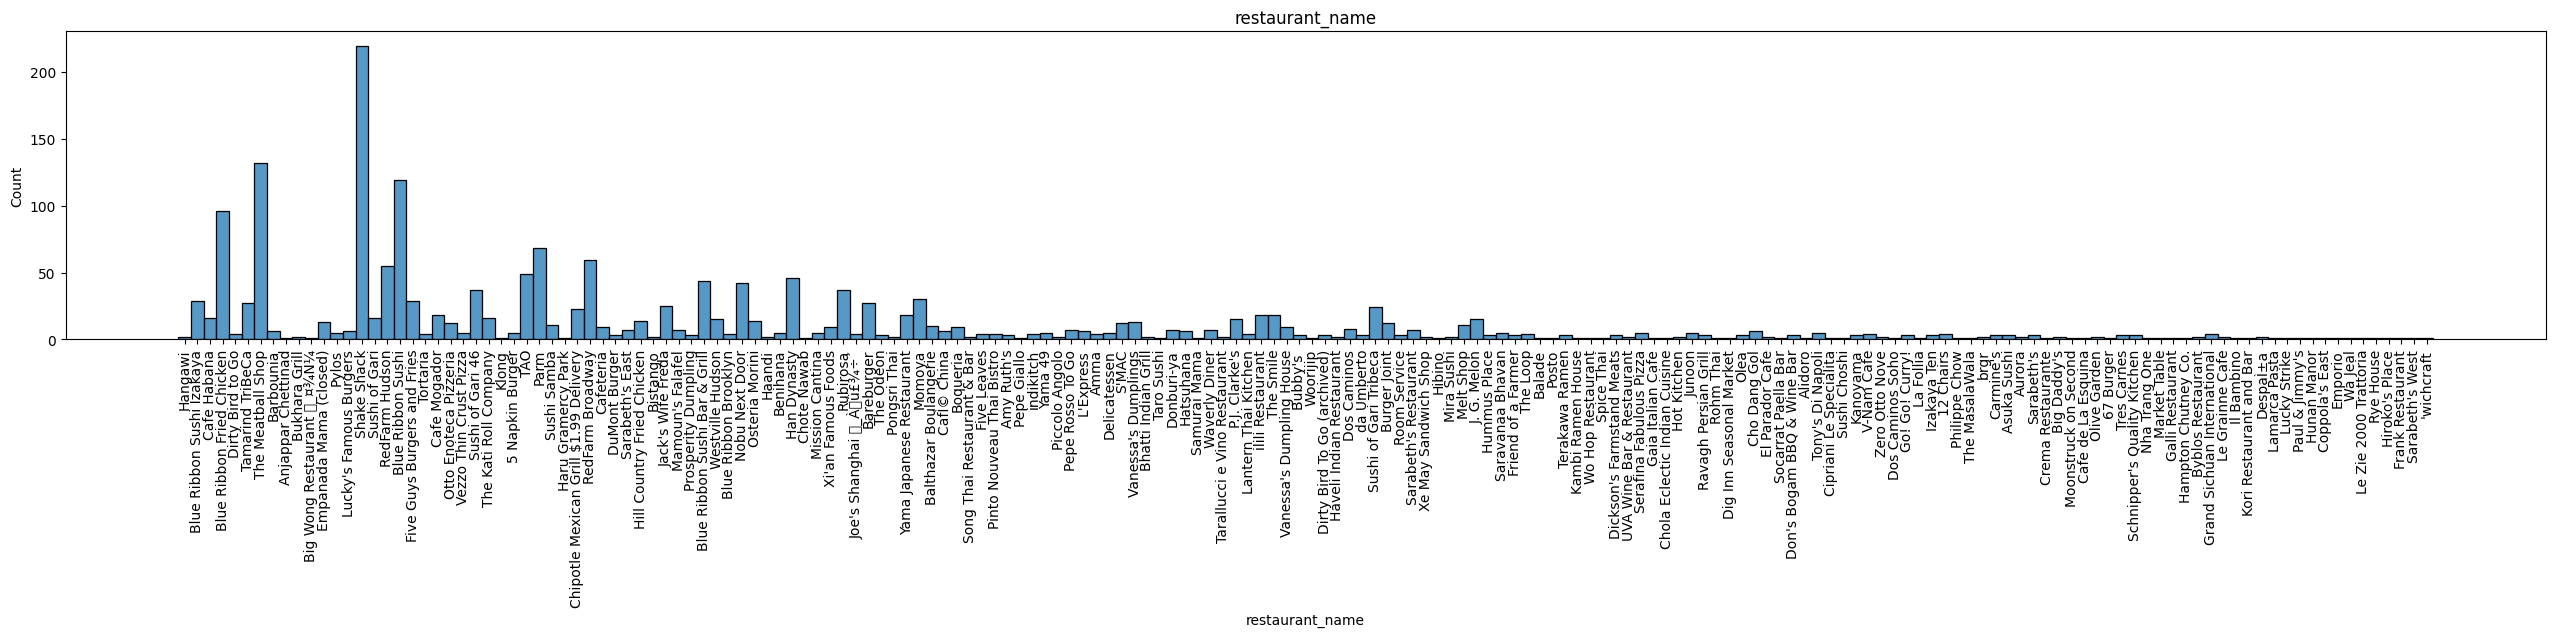

In [66]:
# Let's check the 'restaurant_name' data with histogram
plt.figure(figsize=(32,4))     #sets width and height of the figure
sns.histplot(data=df, x='restaurant_name')#'restaurant_name')    #plots a histogram of the restaurants
plt.xticks(rotation=90)   #rotates x axis labels for better visibility
plt.title('restaurant_name')   #sets the title
plt.show()

#### Observations:
*    Shake Shack is the most ordered restaurant, above 200. It is follosed by The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [67]:
# Write the code here
# Counting how many times each restaurant is mentioned on the data
df['restaurant_name'].value_counts()[:5] #selecting first 5 rows

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
*       Top 5 restaurants by the amount of order received are (from top to bottom): Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [68]:
# Write the code here
# Selecting the cusine column with the condition that 'day_of_the_week' is on weekend
df['cuisine_type'][df['day_of_the_week']=='Weekend'].value_counts()[:1] #Selecting firs row(highest count)

,count
cuisine_type,
American,415


#### Observations:
* Most popular cuisine type on weekends is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [69]:
# Write the code here
# Selecting 'cost_of_the_order' from dataframe and counting how many of them are above 20 dollars, assigning to avariable called amount
amount=round(df['cost_of_the_order'][df['cost_of_the_order']>20].count()/df['cost_of_the_order'].count()*100,2)  #dividing with total row count and multiplying with 100 to convert to percentage
print(amount,'% of orders cost more than 20 dollars.')

29.24 % of orders cost more than 20 dollars.


#### Observations:
*      29.24% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [70]:
# Write the code here
# taking mean of the column 'delivery_time'
mean_delivery_time=round(df['delivery_time'].mean(),2)
print('Mean delivery time is',mean_delivery_time,'minutes.')

Mean delivery time is 24.16 minutes.


#### Observations:
*     Mean delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [71]:
# Write the code here
# Grouping rows by customer_id and counting how many order_id in each customer_id group
df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)[:3]  #sorting starting from highest and selecting top 3

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
*       3 most frequent customers'ids are 52832, 47440 and 83287.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


#### Multivariate analsis of numerical vairables

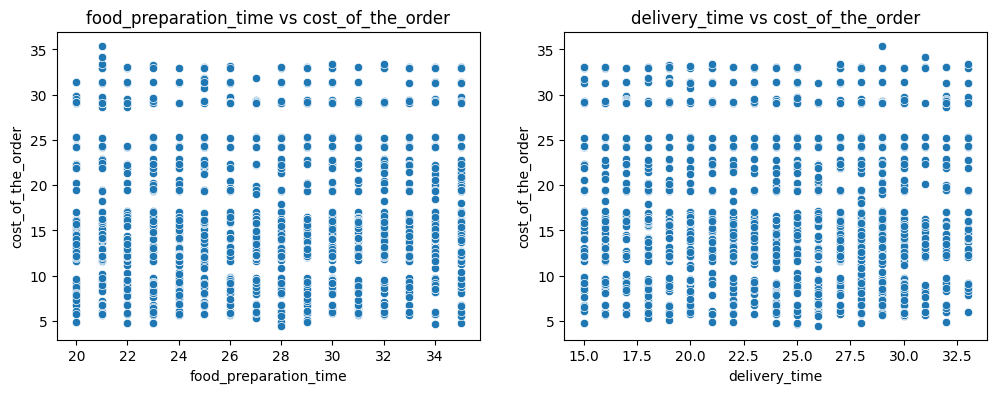

In [72]:
# Write the code here
#Let's start with bivariate abalysis of continuous to continous variables
plt.figure(figsize=(12,4))  #sets width and height of the figure
plt.subplot(1,2,1)   #provides row, column and position of the subplot
sns.scatterplot(x=df['food_preparation_time'],y=df['cost_of_the_order'])   #plots a scatter plot of variables
plt.title('food_preparation_time vs cost_of_the_order')    #sets the title
plt.subplot(1,2,2)
sns.scatterplot(x=df['delivery_time'],y=df['cost_of_the_order'])   #plots a scatter plot of variables
plt.title('delivery_time vs cost_of_the_order')
plt.show()

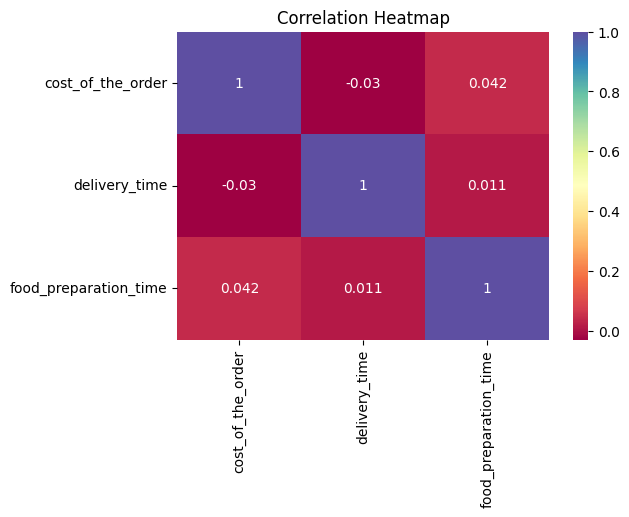

In [73]:
#Let's confirm if there are not any correlation among continuous variables
cont_columns = df[['cost_of_the_order', 'delivery_time', 'food_preparation_time']]

# Plot the heatmap of correlations
plt.figure(figsize=(6,4))
sns.heatmap(cont_columns.corr(), annot=True,cmap='Spectral')
plt.title('Correlation Heatmap')
plt.show()

##### Observations
*  There is not a visible relationship between prep time, delivery time and cost.

#### Multivariate analysis of numerical and categorical variables

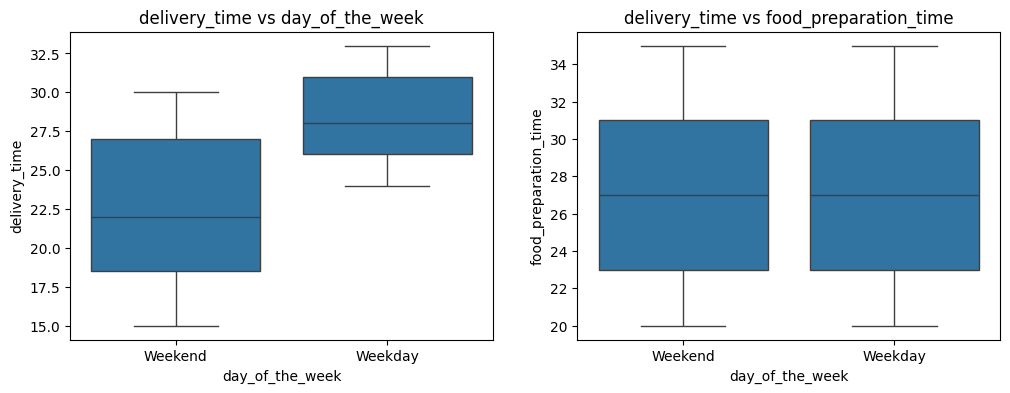

In [74]:
#Now let's check relationship between continous and categorical variables

#First to look at week day relationship with delivery time and preparation time
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)    #Locates the second subplot
sns.boxplot(x=df['day_of_the_week'],y=df['delivery_time']) #Boxplot of week day relationship with delivery time
plt.title('delivery_time vs day_of_the_week')

plt.subplot(1,2,2)  #Locates the second subplot
sns.boxplot(x=df['day_of_the_week'],y=df['food_preparation_time']) #Boxplot of week day relationship with prep time
plt.title('delivery_time vs food_preparation_time')
plt.show()

##### Observations
*  On weekdays delivery time  (median at ˜27.5) is longer than weekends (median at ˜22.5)

Text(0.5, 1.0, 'delivery_time vs rating')

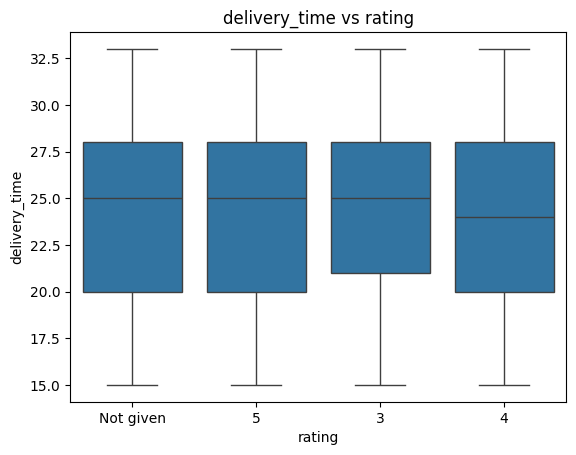

In [75]:
#Does the delivery time play a role on the rating given?
sns.boxplot(x=df['rating'],y=df['delivery_time']) #Boxplot of delivery time vs rating
plt.title('delivery_time vs rating')
plt.title('delivery_time vs rating')

##### Observations
* There is not significant relationship between delivery and rating.

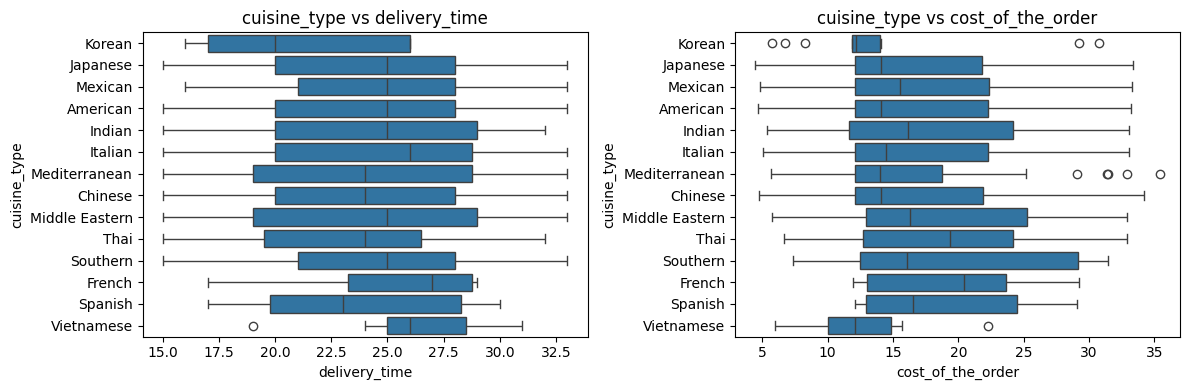

In [76]:
#Let's look at rating with other variables
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)    #Locates the second subplot
sns.boxplot(x=df['delivery_time'],y=df['cuisine_type']) #Boxplot of cuisine_type vs delivery_time
plt.title('cuisine_type vs delivery_time')

plt.subplot(1,2,2)  #Locates the second subplot
sns.boxplot(x=df['cost_of_the_order'],y=df['cuisine_type']) #Boxplot of cuisine_type vs cost_of_the_order
plt.title('cuisine_type vs cost_of_the_order')

plt.tight_layout()
plt.show()

##### Observations:
* Delivery time and cost have similar distributions for most of the cuisine type.
  * Vietnamese food appear to have less spread on the delivery time, it's on the longer side and the median cost is lower than the others.
  * Korean cuisine also appear to have less of a median delivery time and the cost distribution is lower than the others.

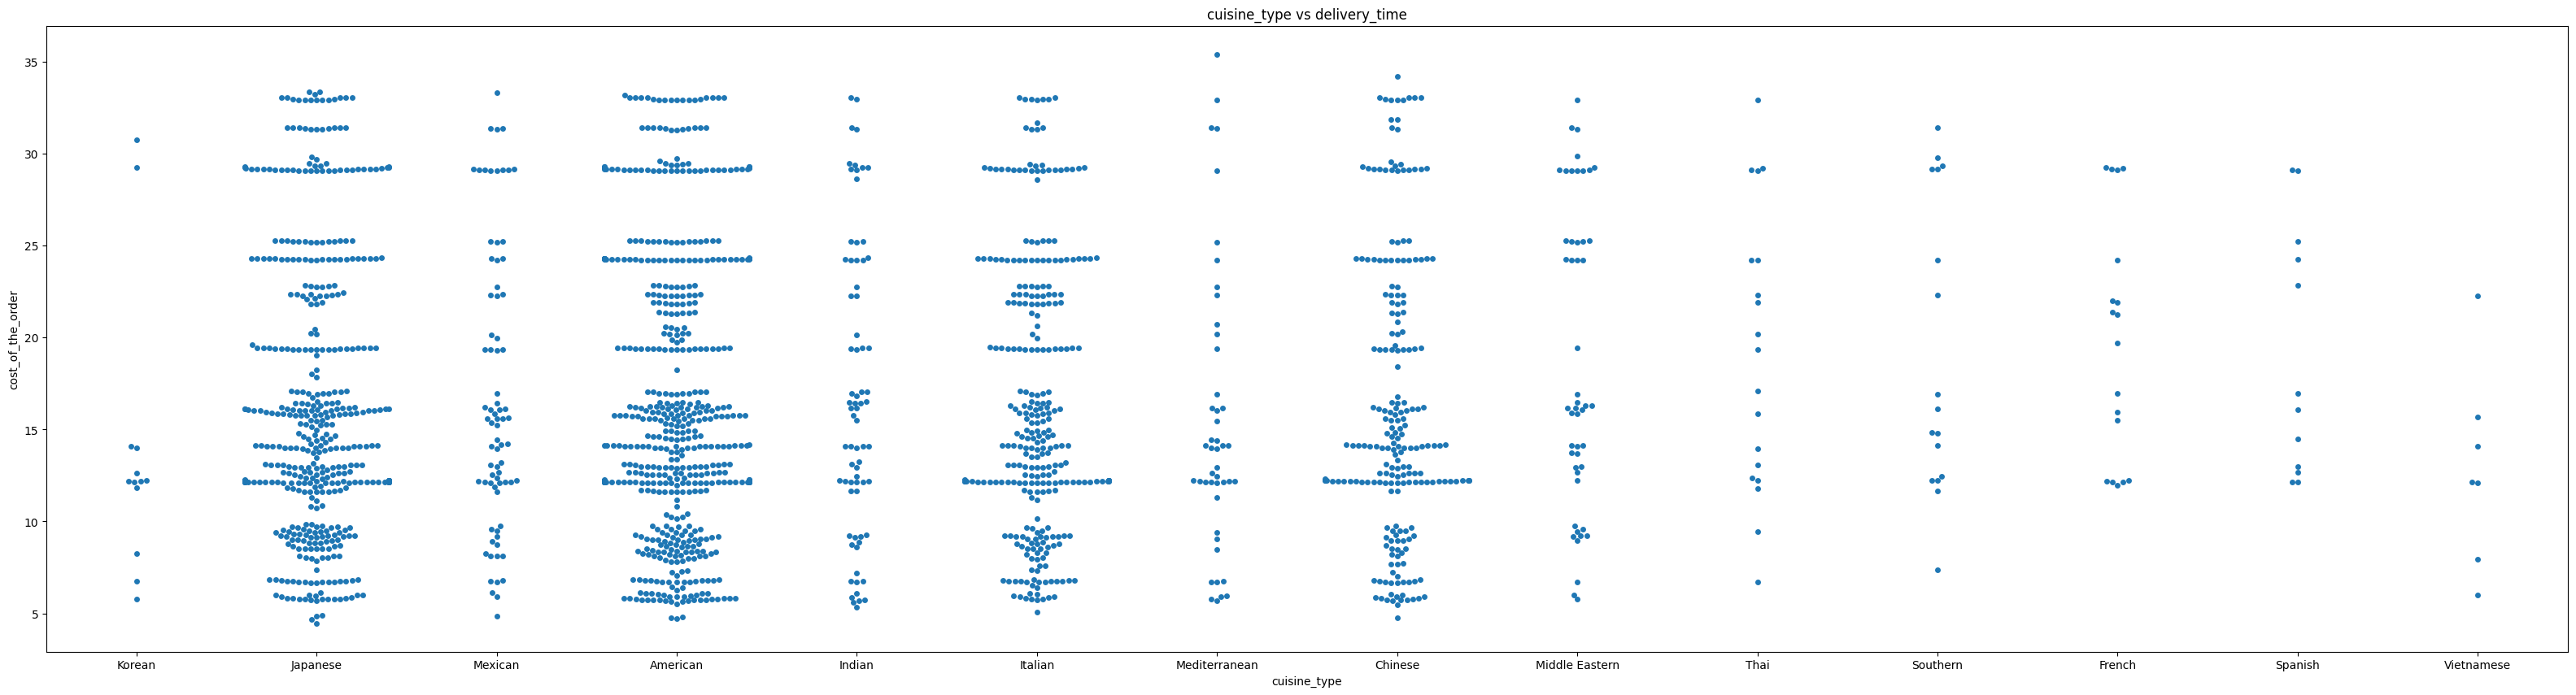

In [77]:
#Let's look at rating with other variables

#This plot shows the cost variation for each type of cuisine
plt.figure(figsize=(40,10))
sns.swarmplot(x=df['cuisine_type'], y=df['cost_of_the_order'], data=df) #Boxplot of cuisine_type vs delivery_time
plt.title('cuisine_type vs delivery_time')
plt.show()

#### Observations
*  There doesn't seem to be a visible relationship between prep time, delivery time with cost.
*  No visible relation between rating and delivery time too.
*  On weekdays delivery time  (median at ˜27.5) is longer than weekends (median at ˜22.5)
*    On weekdays the delivery time is much higher compared to weekends, but the prep time doesn't vary.
*    Ratings are not significantly impacted by the delivery time.
*    Delivery time and cost have similar distributions for most of the cuisine type.
  *   Vietnamese food appear to have less spread on the delivery time, it's on the longer side and the median cost is lower than the others.
  *    Korean cuisine also appear to have less of a median delivery time and the cost distribution is lower than the others.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [78]:
# Write the code here

# 'rating' column contains entries other than numbers ('Not given'). First drop those.
data_rating = df.loc[df['rating'] != 'Not given'].reset_index(drop=True)
# 'rating'column is also the type string, but to be able to filter for values >4, it needs to be a float or integer
data_rating['rating'] = data_rating['rating'].astype(float)

#Now let's group by the restaurants and take the mean and count of the ratings for each
restaurant_stats = data_rating.groupby('restaurant_name')['rating'].agg(['mean', 'count'])
#Apply the filters at the question
restaurant_stats = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]
print(restaurant_stats)

                               mean  count
restaurant_name                           
Blue Ribbon Fried Chicken  4.328125     64
Blue Ribbon Sushi          4.219178     73
Shake Shack                4.278195    133
The Meatball Shop          4.511905     84


#### Observations:
The company should provide promotional for:
*   Blue Ribbon Fried Chicken
*   Blue Ribbon Sushi
*   Shake Shack
*   The Meatball Shop


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [79]:
# Write the code here
# The dataframe is filtered for above 20 dollars, and multiplied with the 25% charge. Similar is done for between 5 and 20, with 15%. Results are summed.
print(round((df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25).sum() + (df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'] * 0.15).sum(),2),'USD')

6166.3 USD


#### Observations:

The revenue is 6,166.3 USD.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [80]:
# Write the code here

#New column called 'total_time'is created to represent time passed from order to delivery
df['total_time']=df['delivery_time']+df['food_preparation_time']

#New column is filtered for above 60 minutes and counted. Divided by row numbers and multiplied by 100 for percentage
print(round(df[df['total_time']>60]['total_time'].count()/df['total_time'].count()*100,2),'%')


10.54 %


#### Observations:
10.54% of the orders take more than 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [81]:
# Write the code here
# Data is grouped by day_of_the_week and their mean is taken
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
*   Mean delivery time on weekdays is apprx 28 minutes. For weekends the mean delivery time is apprx 22 minutes.
*   On weekdays delivery takes more than weekends by average.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Most ordered cuisine is American and most ordered restaurant is Shake Shack.
*  Orders are made more on weekends than weekdays.
*  There doesn't seem to be a visible relationship between prep time, delivery time, rating and cost.
* On weekdays delivery time (median at ˜27.5) is longer than weekends (median at ˜22.5)
* Delivery time and cost have similar distributions for most of the cuisine type
*  The company made 6k USD net revenue.
*  10% of the orders take more than 60 minutes, after the order is accepted by the restaurant.
*  29.24% of the orders cost more than 20 dollars.

### Recommendations:

*   Highly rated restaurants can be promoted more such as Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop.
*   American cuisine can be suggested to customers as it is highly preferred, this could create more orders.
*   Additionally, company should look opportunities to increase amount of orders during the weekdays, as they are low.
*   It may also be good to try to increase orders above 20 usd for higher revenue.


---

In [83]:
!pip install nbconvert
!jupyter nbconvert --to html '/content/drive/MyDrive/Great Learning x MIT/Assignment 1 - Foundations for Data Science/FDS Project Learner Notebook Full Code.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Great Learning x MIT/Assignment 1 - Foundations for Data Science/FDS Project Learner Notebook Full Code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 1316762 bytes to /content/drive/MyDrive/Great Learning x MIT/Assignment 1 - Foundations for Data Science/FDS Project Learner Notebook Full Code.html
